Importing libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import  LinearRegression
from sklearn.linear_model import Ridge,RidgeCV,Lasso
from sklearn.linear_model import MultiTaskLassoCV

uploading the dataset and creating a dataframe

In [3]:
df=pd.read_excel('/content/ENB2012_data.xlsx')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


checking for null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


statistical description

In [5]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


Heatmap- checking the correlation

<Axes: >

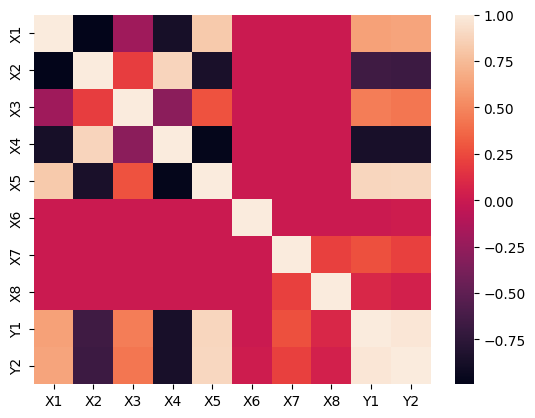

In [6]:
sns.heatmap(df.corr())

In [7]:
X = df.drop(['Y1', 'Y2'], axis=1)

standardize values

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Calculating VIF -
A variance inflation factor is a measure of the amount of multicollinearity in regression analysis. Multicollinearity exists when there is a correlation between multiple independent variables in a multiple regression model.



In [11]:
vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print(vif_df)

  Feature         VIF
0      X1  105.524054
1      X2         inf
2      X3         inf
3      X4         inf
4      X5   31.205474
5      X6    1.000000
6      X7    1.047508
7      X8    1.047508


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [12]:
df.drop(columns=["X1","X2","X3","X4","X5"],inplace=True)

In [14]:
df.head()

,X6,X7,X8,Y1,Y2
0,2,0.0,0,15.55,21.33
1,3,0.0,0,15.55,21.33
2,4,0.0,0,15.55,21.33
3,5,0.0,0,15.55,21.33
4,2,0.0,0,20.84,28.28


declaring independent and dependent variables

In [15]:
X=df[["X6","X7","X8"]].values
Y=df[["Y1","Y2"]].values

splitting the data

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=17)

standardizing

In [19]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

LINEAR REGRESSION

In [20]:
lr=LinearRegression()
lr.fit(X_train,y_train)
prediction=lr.predict(X_test)
actual=y_test

In [21]:
train_score_lr=lr.score(X_train,y_train)
test_score_lr=lr.score(X_test,y_test)

scores

In [23]:
print('The train score for lr model is {}'.format(train_score_lr))
print('The test score for lr model is {}'.format(test_score_lr))

The train score for lr model is 0.0733523525941483
The test score for lr model is 0.013438557312916044


#RIDGE REGRESSION
Ridge regression is a statistical regularization technique. It reduces overfitting on training data in machine learning models. It is also known as L2 regularization.

In [24]:
ridgeReg = Ridge(alpha=10)
ridgeReg.fit(X_train,y_train)

train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

ALPHA PARAMETER-
is a hyperparameter that controls the amount of regularization applied to the model.

score

In [25]:
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))

The train score for ridge model is 0.07332827619561039
The test score for ridge model is 0.014475686518809483


#LASSO REGRESSION
Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction.

In [26]:
lasso = Lasso(alpha = 1)
lasso.fit(X_train,y_train)
train_score_ls = lasso.score(X_train, y_train)
test_score_ls = lasso.score(X_test, y_test)

In [27]:
print("The train score for lasso model is {}".format(train_score_ls))
print("The test score for lasso model is {}".format(test_score_ls))

The train score for lasso model is 0.06237643203061688
The test score for lasso model is 0.02539170381907424


Multi Task Cross Validation Model

In [29]:
lasso_cv = MultiTaskLassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)

In [30]:
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))

0.0676391608991323
0.023900443167537866
